In [1]:
import pandas as pd
import json
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zero_shot = {
        'q_recognition': 37.51, 
         'q_location': 16.78,
         'q_judge': 61.51,	
         'q_commonsense':65.94,
         'q_count':30.2, 
         'q_action': 56.45,
         'q_color': 51.35,
         'q_type': 40.95,
         'q_subcategory': 42.24,
         'q_causal': 1.75
         }
				

In [3]:
file_path = Path('../out/naiveblip_ft.json')
with open(file_path, 'r') as f:
    results = json.load(f)
keys = [list(results[idx].keys())[0] for idx in range(len(results))]
result_matrix = np.zeros((len(keys), len(keys)))
for source_idx, source_key in enumerate(keys):
    for target_idx, target_key in enumerate(keys):
        result_matrix[source_idx, target_idx] = results[source_idx][source_key][target_key][0]["Test/overall"]
zero_shot_matrix = np.array([zero_shot[key] for key in keys])
zero_shot_matrix = np.repeat(zero_shot_matrix[None], repeats=len(keys), axis=0)

result_matrix =  zero_shot_matrix - result_matrix

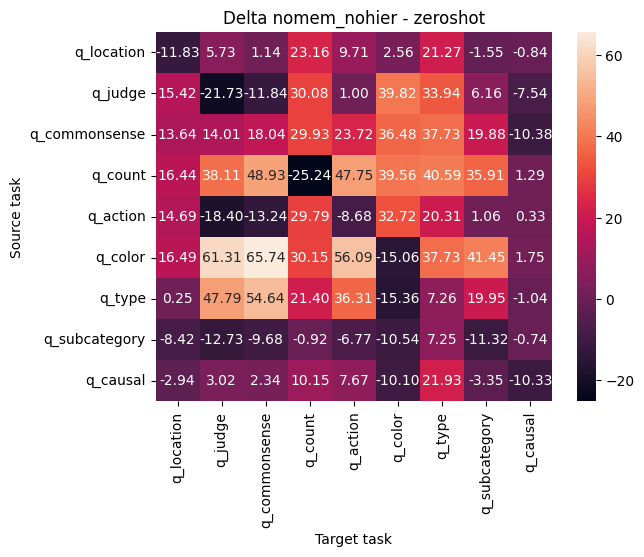

In [4]:
ax = sns.heatmap(result_matrix, xticklabels=keys, yticklabels=keys, annot=True, fmt='.2f')
plt.title('Delta nomem_nohier - zeroshot')
plt.xlabel('Target task')
plt.ylabel('Source task')
plt.show()